In [1]:
install.packages(c('twitteR', 'ggmap', 'ggplot2', 'utf8', 'maps', 'maptools', 'RCurl', 'rjson', 'httr', 'googleVis'))

also installing the dependencies ‘bit’, ‘bit64’, ‘proto’, ‘RgoogleMaps’, ‘png’, ‘mapproj’, ‘jpeg’, ‘geosphere’, ‘sp’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
library(twitteR)
library(ggmap)
library(RgoogleMaps)
library(ggplot2)
library(utf8)
library(geosphere)
library(httr)
library(png)
library(jpeg)
library(maps)
library(maptools)
library(RCurl)
library(rjson)
library(plyr)

Loading required package: ggplot2
Loading required package: sp
Checking rgeos availability: FALSE
 	Note: when rgeos is not available, polygon geometry 	computations in maptools depend on gpclib,
 	which has a restricted licence. It is disabled by default;
 	to enable gpclib, type gpclibPermit()
Loading required package: bitops

Attaching package: ‘plyr’

The following object is masked from ‘package:maps’:

    ozone

The following object is masked from ‘package:twitteR’:

    id



In [3]:
# Load the data obtained from the other jupyter file# data cleaned to get only the addressed and geocode of the united states, removed ones with duplicates since some of the searches overlapped
ll.flu_2_24_3_06_East_part1_USA <- as.data.frame(read.csv(file = "data/unique_lat_long/ll.flu_2_24_3_06_East_part1_USA.csv", header = T, sep = ","))
ll.flu_2_24_3_06_EastDF_part2_USA <- as.data.frame(read.csv(file = "data/unique_lat_long/ll.flu_2_24_3_06_EastDF_part2_USA.csv", header = T, sep = ","))
ll.flu_2_24_3_06_West_part2_USA <- as.data.frame(read.csv(file = "data/unique_lat_long/ll.flu_2_24_3_06_West_part2_USA.csv", header = T, sep =","))
ll.flu_2_24_3_06_West_part3_USA <- as.data.frame(read.csv(file = "data/unique_lat_long/ll.flu_2_24_3_06_West_part3_USA.csv", header = T, sep = ","))
ll.influenza_2_24_3_09_part2DF_USA <- as.data.frame(read.csv(file = "data/unique_lat_long/ll.influenza_2_24_3_09_part2DF_USA.csv", header = T, sep = ","))
ll.influenza_2_24_3_09DF_USA <- as.data.frame(read.csv(file = "data/unique_lat_long/ll.influenza_2_24_3_09DF_USA.csv", header = T, sep = ","))

In [4]:
ll.flu_2_24_3_06_East_part1_USA <- ll.flu_2_24_3_06_East_part1_USA[,c(2:4)]
ll.flu_2_24_3_06_EastDF_part2_USA <- ll.flu_2_24_3_06_EastDF_part2_USA[,c(2:4)]
ll.flu_2_24_3_06_West_part2_USA <- ll.flu_2_24_3_06_West_part2_USA[,c(3:5)]
ll.flu_2_24_3_06_West_part3_USA <- ll.flu_2_24_3_06_West_part3_USA[,c(3:5)]
ll.influenza_2_24_3_09_part2DF_USA <- ll.influenza_2_24_3_09_part2DF_USA[,c(2:4)]
ll.influenza_2_24_3_09DF_USA <- ll.influenza_2_24_3_09DF_USA[,c(2:4)]

In [15]:
usa_super_data <- as.data.frame(NULL, NULL)
usa_super_data <- rbind(usa_super_data, ll.flu_2_24_3_06_East_part1_USA)
usa_super_data <- rbind(usa_super_data, ll.flu_2_24_3_06_EastDF_part2_USA)
usa_super_data <- rbind(usa_super_data, ll.flu_2_24_3_06_West_part2_USA)
usa_super_data <- rbind(usa_super_data, ll.flu_2_24_3_06_West_part3_USA)
usa_super_data <- rbind(usa_super_data, ll.influenza_2_24_3_09_part2DF_USA)
usa_super_data <- rbind(usa_super_data, ll.influenza_2_24_3_09DF_USA)

In [16]:
#write.csv(x = usa_super_data, file = "usa_super_data.csv")

In [17]:
# LOAD THE SUPER DATA
usa_super_data <- as.data.frame(read.csv(file = "data/usa_super_data.csv", header = T, sep = ","))
usa_super_data

X,lon,lat,address
1,-119.41793,36.77826,"california, usa"
2,-104.99025,39.73924,"denver, co, usa"
3,-111.57641,40.25326,"forest rd 027, utah, usa"
4,-76.64127,39.04575,"maryland, usa"
5,-87.62980,41.87811,"chicago, il, usa"
6,-121.49440,38.58157,"sacramento, ca, usa"
7,-78.54862,35.38211,"benson, nc 27504, usa"
8,-90.45644,39.62979,"6 il-106, winchester, il 62694, usa"
9,-84.10523,40.74255,"lima, oh, usa"
10,-90.53897,41.82400,"dewitt, ia 52742, usa"


In [56]:
stateDF <- myDataFrame <- read.csv(text="state", header = TRUE, stringsAsFactors = FALSE)

In [79]:
counter <- 0
#stateDF <- myDataFrame <- read.csv(text="state", header = TRUE, stringsAsFactors = FALSE)
stateList <- c()
for(i in i:nrow(usa_super_data)){
    if(counter == 3){
        Sys.sleep(1)
        counter <- 0
    }
    counter <- counter + 1
    while(length(stateList) != i){
        reversedgeo <- revgeocode(c(usa_super_data[i,]$lon, usa_super_data[i,]$lat), output = 'more')
        if(length(reversedgeo$address) != 0){
            #stateDF <- rbind(stateDF, tolower(reversedgeo$administrative_area_level_1))
            stateList <- c(stateList, tolower(reversedgeo$administrative_area_level_1))
            #print(tolower(reversedgeo$administrative_area_level_1))
            }
        } 
    }
head(stateList)
# ended at 1701, did not get all 2021

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=41.8239952,-90.5389662&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=41.8239952,-90.5389662&sensor=false
Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-90.5389662"reverse geocode failed - bad location? location = "41.8239952"”Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-90.5389662"reverse geocode failed - bad location? location = "41.8239952"”Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-90.5389662"reverse geocode failed - bad location? location = "41.8239952"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=41.8239952,-90.5389662&sensor=false
Information from UR

“reverse geocode failed - bad location? location = "-74.0059728"reverse geocode failed - bad location? location = "40.7127753"”Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-74.0059728"reverse geocode failed - bad location? location = "40.7127753"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.7127753,-74.0059728&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=43.9695148,-99.9018131&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=42.3600825,-71.0588801&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=38.253749,-78.458708&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=39.9525839,-75.1652215&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=30.2

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=43.2022038,-77.6598376&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=61.0977072,-149.7471875&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=34.7394776,-106.1007279&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=45.3596723,-70.1545818&sensor=false
Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-96.7969879"reverse geocode failed - bad location? location = "32.7766642"”.Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-96.7969879"reverse geocode failed - bad location? location = "32.7766642"”.Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - 

“reverse geocode failed - bad location? location = "-80.8431267"reverse geocode failed - bad location? location = "35.2270869"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=35.2270869,-80.8431267&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=32.3593117,-95.7257968&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=32.735687,-97.1080656&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=64.2008413,-149.4936733&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=36.1699412,-115.1398296&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=38.5976262,-80.4549026&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.6081591,-74.2776468&sensor=false
.Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=32.1656221,-82.9000751&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=32.4507852,-107.4338866&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=39.7268116,-75.0359613&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=39.7128024,-74.8965763&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=42.2411499,-83.6129939&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=41.8460962,-94.3096871&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=41.5992209,-87.964925&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=39.022807,-94.658108&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=36.2809202,-83.5149023&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=41.8781136,-87.6297982&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.0466571,-76.1783739&sensor=false
Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-104.9793907"reverse geocode failed - bad location? location = "39.7368455"”Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-104.9793907"reverse geocode failed - bad location? location = "39.7368455"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=39.7368455,-104.9793907&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=32.772201,-102.623199&sensor=f

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=45.5230622,-122.6764815&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=42.6192183,-112.0069083&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=37.5585465,-122.2710788&sensor=false
Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-71.4128343"reverse geocode failed - bad location? location = "41.8239891"”Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-71.4128343"reverse geocode failed - bad location? location = "41.8239891"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=41.8239891,-71.4128343&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=33.1433723,-117.1661449&sensor

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=36.0416083,-83.4252673&sensor=false
Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-73.9983821"reverse geocode failed - bad location? location = "40.6394368"”Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-73.9983821"reverse geocode failed - bad location? location = "40.6394368"”.Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-73.9983821"reverse geocode failed - bad location? location = "40.6394368"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.6394368,-73.9983821&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=31.9685988,-99.9018131&sensor=false
.Information fr

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=41.8781136,-87.6297982&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=43.5445959,-96.7311034&sensor=false
Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-88.2241279"reverse geocode failed - bad location? location = "44.817436"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=44.817436,-88.2241279&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.7127753,-74.0059728&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=41.6572525,-72.6655757&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=47.6776832,-116.7804664&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=35.6531943,-83.

“reverse geocode failed - bad location? location = "-97.0583681"reverse geocode failed - bad location? location = "36.1156071"”.Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-97.0583681"reverse geocode failed - bad location? location = "36.1156071"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=36.1156071,-97.0583681&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=32.7667955,-96.5991593&sensor=false
.Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-91.9623327"reverse geocode failed - bad location? location = "30.9842977"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=30.9842977,-91.9623327&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=32.7554883,-97.33076

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.7127753,-74.0059728&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=31.9685988,-99.9018131&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=41.8781136,-87.6297982&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=34.715291,-76.662988&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=42.1945758,-122.7094767&sensor=false
.Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-111.0937311"reverse geocode failed - bad location? location = "34.0489281"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=34.0489281,-111.0937311&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=38.7209454,-7

“reverse geocode failed - bad location? location = "-95.712891"reverse geocode failed - bad location? location = "37.09024"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=37.09024,-95.712891&sensor=false
Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-86.158068"reverse geocode failed - bad location? location = "39.768403"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=39.768403,-86.158068&sensor=false
.Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-119.4179324"reverse geocode failed - bad location? location = "36.778261"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=36.778261,-119.4179324&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=47.6062095,-122.3320708&sensor

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.9892658,-73.9066342&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=43.0378084,-87.9079264&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=31.9685988,-99.9018131&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=26.1224386,-80.1373174&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=29.9988306,-95.1765978&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.787878,-74.3882072&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=39.0457549,-76.6412712&sensor=false
.Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-86.2604102"reverse geocode failed - bad location? loca

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=32.2217429,-110.926479&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=37.09024,-95.712891&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=38.9071923,-77.0368707&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.0581205,-82.4012642&sensor=false
.Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-117.7499909"reverse geocode failed - bad location? location = "34.055103"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=34.055103,-117.7499909&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=34.4208305,-119.6981901&sensor=false
Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse ge

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=42.3600825,-71.0588801&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=38.555909,-84.7602933&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.7127753,-74.0059728&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=32.748016,-97.333486&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=39.5500507,-105.7820674&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=28.3593133,-81.5605083&sensor=false
Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-97.135173"reverse geocode failed - bad location? location = "32.549858"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=32.549858,-97.13517

“reverse geocode failed - bad location? location = "-76.7570041"reverse geocode failed - bad location? location = "38.9862428"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=38.9862428,-76.7570041&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=32.7554883,-97.3307658&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=42.6525793,-73.7562317&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.8115504,-73.9464769&sensor=false
Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-122.2913078"reverse geocode failed - bad location? location = "37.8271784"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=37.8271784,-122.2913078&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=3

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.7127753,-74.0059728&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=21.4389123,-158.0000565&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=42.331427,-83.0457538&sensor=false
.Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-76.8610462"reverse geocode failed - bad location? location = "39.2037144"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=39.2037144,-76.8610462&sensor=false
Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-70.8967155"reverse geocode failed - bad location? location = "42.51954"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=42.51954,-70.8967155&sensor=false


Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-71.467566"reverse geocode failed - bad location? location = "42.7653662"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=42.7653662,-71.467566&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=36.153315,-95.971261&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=39.9525839,-75.1652215&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=35.6162921,-82.5673127&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=34.0522342,-118.2436849&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=41.8781136,-87.6297982&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=32.2217429,-110.9

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=32.7558935,-111.6709584&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=35.7341718,-78.7788498&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=39.6826436,-75.749892&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=36.7468422,-119.7725868&sensor=false
.Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-79.9592134"reverse geocode failed - bad location? location = "40.5594832"”Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-79.9592134"reverse geocode failed - bad location? location = "40.5594832"”.Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - 

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=30.7918476,-94.1800384&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=42.6525793,-73.7562317&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=32.7766642,-96.7969879&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.7127753,-74.0059728&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=36.778261,-119.4179324&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=43.5445959,-96.7311034&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=34.2331373,-102.4107493&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=37.09024,-95.712891&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latl

.Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-116.419389"reverse geocode failed - bad location? location = "38.8026097"”.Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-116.419389"reverse geocode failed - bad location? location = "38.8026097"”.Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-116.419389"reverse geocode failed - bad location? location = "38.8026097"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=38.8026097,-116.419389&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=37.09024,-95.712891&sensor=false
Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.106374,-83.086444&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=47.7179578,-116.9515856&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=32.4507852,-107.4338866&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=38.440429,-122.7140548&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=39.5500507,-105.7820674&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=39.768403,-86.158068&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=39.022807,-94.658108&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=38.4660038,-90.1543554&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.7127753,-74.0059728&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=34.4208305,-119.6981901&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=37.7697087,-97.3047051&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=38.9031004,-77.0340315&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=36.153315,-95.971261&sensor=false
.Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-80.2491961"reverse geocode failed - bad location? location = "35.8138523"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=35.8138523,-80.2491961&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=37.09024,-95.712

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.4172871,-82.907123&sensor=false
.Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-86.7816016"reverse geocode failed - bad location? location = "36.1626638"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=36.1626638,-86.7816016&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=42.0028761,-71.5147839&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=32.715738,-117.1610838&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=44.6697805,-74.9813084&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.789142,-73.134961&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=39.9611755,-82.9987

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=42.3600825,-71.0588801&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=30.267153,-97.7430608&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=36.1023715,-115.1745559&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=29.7030024,-98.1244531&sensor=false
Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-81.5157535"reverse geocode failed - bad location? location = "27.6648274"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=27.6648274,-81.5157535&sensor=false
.Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-78.4857342"reverse geocode failed - bad location? location = "42.529455

.Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-75.26046"reverse geocode failed - bad location? location = "40.0084456"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.0084456,-75.26046&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.5865396,-122.3916754&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=36.8954012,-76.1476538&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.7127753,-74.0059728&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=37.09024,-95.712891&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=30.0575359,-95.1902986&sensor=false
.Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geoco

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=30.267153,-97.7430608&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=39.7693678,-84.1768507&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=34.2331373,-102.4107493&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=39.9525839,-75.1652215&sensor=false
Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-73.9441579"reverse geocode failed - bad location? location = "40.6781784"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.6781784,-73.9441579&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.6781784,-73.9441579&sensor=false
Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse 

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=32.7766642,-96.7969879&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=39.692037,-104.9416688&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=39.7919657,-86.1445299&sensor=false
.Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-95.712891"reverse geocode failed - bad location? location = "37.09024"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=37.09024,-95.712891&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=34.0038165,-118.3267992&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=30.2968367,-91.1882837&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=36.778261,-119.41793

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.2798274,-75.2993417&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=29.7711306,-91.755772&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=32.715738,-117.1610838&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=43.0389025,-87.9064736&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=32.7554883,-97.3307658&sensor=false
Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-77.0732748"reverse geocode failed - bad location? location = "39.5156627"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=39.5156627,-77.0732748&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.7127753,-74.0

“reverse geocode failed - bad location? location = "-82.9000751"reverse geocode failed - bad location? location = "32.1656221"”.Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-82.9000751"reverse geocode failed - bad location? location = "32.1656221"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=32.1656221,-82.9000751&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=34.0522342,-118.2436849&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=33.801162,-84.178641&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=30.6953657,-88.0398912&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=34.095287,-118.1270146&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.4

“reverse geocode failed - bad location? location = "-72.307869"reverse geocode failed - bad location? location = "43.7153482"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=43.7153482,-72.307869&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=36.778261,-119.4179324&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=44.9028713,-91.9206505&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.7127753,-74.0059728&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=35.5587725,-97.6385368&sensor=false
Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-86.5804473"reverse geocode failed - bad location? location = "35.5174913"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=35.5

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=32.7913116,-116.9446123&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=26.1595194,-97.9908366&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=31.7093197,-98.9911611&sensor=false
.Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-82.8121191"reverse geocode failed - bad location? location = "39.9547861"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=39.9547861,-82.8121191&sensor=false
Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-118.3023579"reverse geocode failed - bad location? location = "34.0609876"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=34.0609876,-118.3023579&sensor=

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=37.0750055,-94.4751346&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=41.0748188,-73.7751326&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=41.7040641,-73.298408&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=42.3250896,-72.6412013&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=38.4087993,-121.3716178&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.7127753,-74.0059728&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.6939226,-73.9876523&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=33.836081,-81.1637245&sensor=false
Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=34.7123752,-86.6540919&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=39.4235805,-76.9957039&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=39.9525839,-75.1652215&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.4406248,-79.9958864&sensor=false
.Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-118.2436849"reverse geocode failed - bad location? location = "34.0522342"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=34.0522342,-118.2436849&sensor=false
.Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-86.2516406"reverse geocode failed - bad location? location = "33.173

“reverse geocode failed - bad location? location = "-71.4128343"reverse geocode failed - bad location? location = "41.8239891"”.Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-71.4128343"reverse geocode failed - bad location? location = "41.8239891"”Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-71.4128343"reverse geocode failed - bad location? location = "41.8239891"”.Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-71.4128343"reverse geocode failed - bad location? location = "41.8239891"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=41.8239891,-71.4128343&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=37.6963063,-122.0861616&sensor=false
.In

“reverse geocode failed - bad location? location = "-74.0059728"reverse geocode failed - bad location? location = "40.7127753"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.7127753,-74.0059728&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=34.9592083,-116.419389&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.1474837,-102.6616977&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=44.3148443,-85.6023643&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=41.8540094,-72.827915&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=27.6648274,-81.5157535&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=33.6594835,-117.9988026&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/ge

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=29.5584703,-81.2154413&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=41.3163244,-72.9223431&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=37.09024,-95.712891&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=44.9374831,-93.2009998&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=43.6187102,-116.2146068&sensor=false
Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-74.4056612"reverse geocode failed - bad location? location = "40.0583238"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.0583238,-74.4056612&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=37.2248982,-95.70

.Warning message in revgeocode(c(usa_super_data[i, ]$lon, usa_super_data[i, ]$lat), :
“reverse geocode failed - bad location? location = "-82.9000751"reverse geocode failed - bad location? location = "32.1656221"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=32.1656221,-82.9000751&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=38.8816208,-77.0909809&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=43.6375818,-94.1023906&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=37.8043637,-122.2711137&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.7127753,-74.0059728&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=27.3364347,-82.5306527&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.4128551,-

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.789142,-73.134961&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=33.7443245,-90.7072561&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=29.7129086,-95.3582721&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=44.4059902,-69.4672352&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=37.09024,-95.712891&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=38.9517053,-92.3340724&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=34.199884,-119.1782948&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=37.09024,-95.712891&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=30.4

ERROR: Error in reversedgeo$address: $ operator is invalid for atomic vectors


In [75]:
lists<- c()
lists
lists<-c(lists, 45,34)
lists

NULL

[1] 45 34

In [85]:
length(stateList)
stateListDF <- as.data.frame(stateList)
write.csv(x = stateListDF, file = "stateListDF.csv")

[1] 1701

In [37]:
reversedgeo <- revgeocode(c(usa_super_data[1,]$lon, usa_super_data[1,]$lat), output = 'more')
reversedgeo

Warning message in revgeocode(c(usa_super_data[1, ]$lon, usa_super_data[1, ]$lat), :
“reverse geocode failed - bad location? location = "-119.4179324"reverse geocode failed - bad location? location = "36.778261"”

address
NA


In [39]:
reversedgeo <- revgeocode(c(usa_super_data[1,]$lon, usa_super_data[1,]$lat), output = 'more')
reversedgeo

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=36.778261,-119.4179324&sensor=false


address,street_number,route,locality,administrative_area_level_2,administrative_area_level_1,country,postal_code
"2630 Croydon Drive, Sanger, CA 93657, USA",2630,Croydon Drive,Sanger,Fresno County,California,United States,93657


In [28]:
usa_map <- get_map(zoom = 4)

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=29.763284,-95.363271&zoom=4&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false


Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


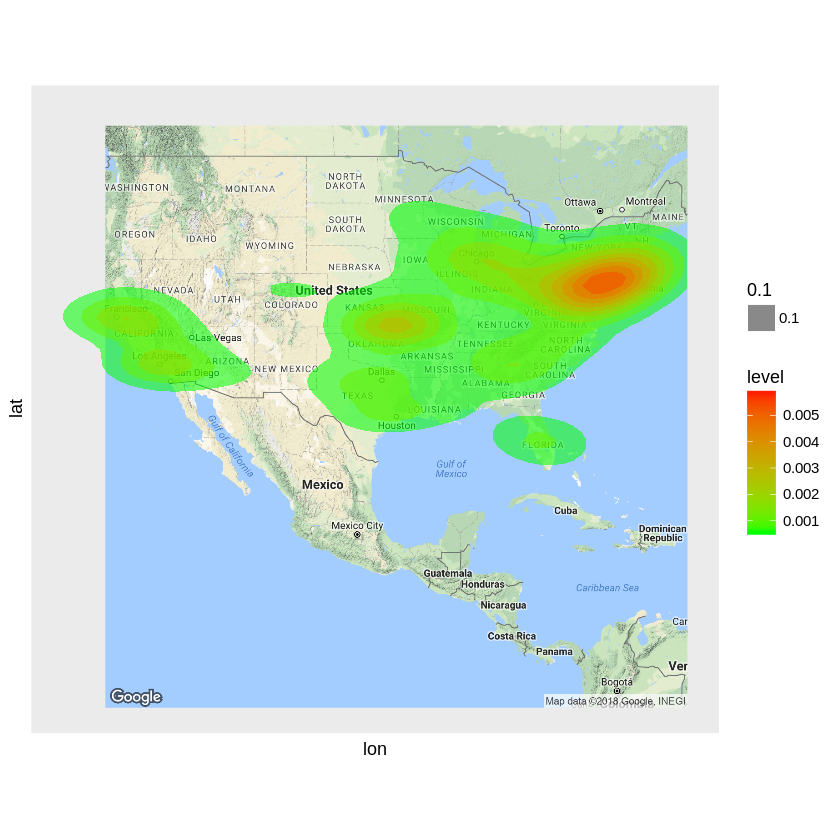

In [19]:
ggmap(usa_map) + 
stat_density2d(aes(x = lon, y = lat, fill = ..level.., alpha = .1), bins = 10, geom = "polygon",data = usa_super_data) +
scale_fill_gradient(low = "green", high = "red") + 
scale_x_continuous(breaks = NULL) +
scale_y_continuous(breaks = NULL) 

In [107]:
states <- c("California", "Alabama", "Arkansas", "Arizona", "Alaska", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming", "district of columbia")
for(i in 1:length(states)){
    states[i] <- tolower(states[i])
}
sort(states)

[1] "alabama"              "alaska"               "arizona"             
 [4] "arkansas"             "california"           "colorado"            
 [7] "connecticut"          "delaware"             "district of columbia"
[10] "florida"              "georgia"              "hawaii"              
[13] "idaho"                "illinois"             "indiana"             
[16] "iowa"                 "kansas"               "kentucky"            
[19] "louisiana"            "maine"                "maryland"            
[22] "massachusetts"        "michigan"             "minnesota"           
[25] "mississippi"          "missouri"             "montana"             
[28] "nebraska"             "nevada"               "new hampshire"       
[31] "new jersey"           "new mexico"           "new york"            
[34] "north carolina"       "north dakota"         "ohio"                
[37] "oklahoma"             "oregon"               "pennsylvania"        
[40] "rhode island"         "south carolina"       "south dakota"        
[43] "tennessee"            "texas"                "utah"                
[46] "vermont"              "virginia"             "washington"          
[49] "west virginia"        "wisconsin"            "wyoming"

In [108]:
frequency_map<-new.env()
for(i in 1:length(states)){
    frequency_map[[as.character(states[i])]] <- 0
}

In [109]:
for(i in 1:length(stateList)){
    frequency_map[[stateList[i]]] <- get(stateList[i], frequency_map) + 1
}

In [113]:
get("california", frequency_map)

[1] 230

In [115]:
theStatesDF <- as.data.frame(x = NULL, text=c("state", "numTweets"))

In [119]:
asDF <- as.data.frame(as.list(frequency_map))

In [120]:
head(asDF)

district.of.columbia,west.virginia,south.carolina,indiana,alaska,california,mississippi,kentucky,new.york,vermont,⋯,ohio,virginia,florida,arizona,missouri,nevada,maine,wisconsin,new.mexico,colorado
42,4,15,27,4,230,3,9,133,6,⋯,49,36,83,23,28,14,7,35,10,30


In [128]:
formattedStatesDF <- data.frame(t(asDF))
colnames(formattedStatesDF) <- c('numTweets')

In [130]:
formattedStatesDF
nrow(formattedStatesDF)
ncol(formattedStatesDF)

,numTweets
district.of.columbia,42
west.virginia,4
south.carolina,15
indiana,27
alaska,4
california,230
mississippi,3
kentucky,9
new.york,133
vermont,6


[1] 51

[1] 1

In [131]:
write.csv(x = formattedStatesDF, file = "formattedStatesDF.csv")

In [133]:
states_list <- c(rownames(formattedStatesDF))

In [134]:
formattedStatesDF$id <- states_list

In [136]:
formattedStatesDF

,numTweets,id
district.of.columbia,42,district.of.columbia
west.virginia,4,west.virginia
south.carolina,15,south.carolina
indiana,27,indiana
alaska,4,alaska
california,230,california
mississippi,3,mississippi
kentucky,9,kentucky
new.york,133,new.york
vermont,6,vermont


In [160]:
install.packages('plotly')
install.packages('ggplot2')
install.packages('fiftystater')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [161]:
library(plotly)
library(ggplot2)
library(fiftystater)

In [165]:
data('fifty_states')
head(fifty_states)

long,lat,order,hole,piece,id,group
-85.07007,31.98070,1,FALSE,1,alabama,Alabama.1
-85.11515,31.90742,2,FALSE,1,alabama,Alabama.1
-85.13557,31.85488,3,FALSE,1,alabama,Alabama.1
-85.13156,31.78381,4,FALSE,1,alabama,Alabama.1
-85.13017,31.77885,5,FALSE,1,alabama,Alabama.1
-85.11529,31.73157,6,FALSE,1,alabama,Alabama.1


In [171]:
tweets_heat_map_dataDF <- merge(fifty_states, formattedStatesDF, by="id", all.formattedStatesDF=T, group = group)
head(tweets_heat_map_dataDF)
write.csv(x = tweets_heat_map_dataDF, file = "tweets_heat_map_dataDF.csv")

id,long,lat,order,hole,piece,group,numTweets
alabama,-85.10296,31.19692,19,FALSE,1,Alabama.1,21
alabama,-85.09337,31.17221,20,FALSE,1,Alabama.1,21
alabama,-85.09360,31.22707,18,FALSE,1,Alabama.1,21
alabama,-85.46029,34.29016,98,FALSE,1,Alabama.1,21
alabama,-85.01700,31.08010,23,FALSE,1,Alabama.1,21
alabama,-85.41657,34.08692,99,FALSE,1,Alabama.1,21


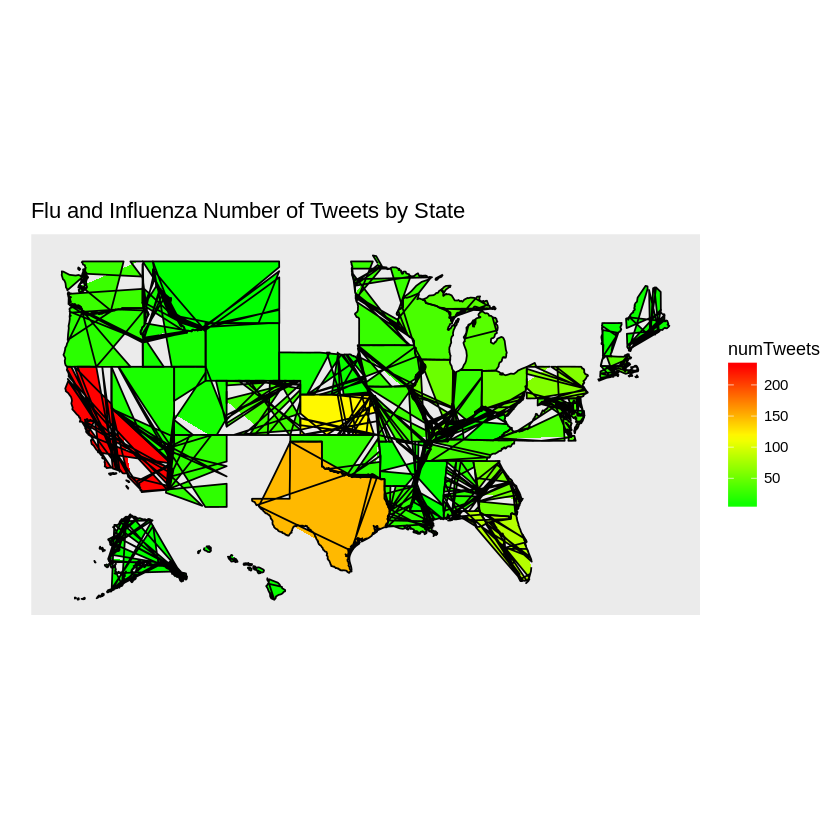

In [172]:
#the_map <- ggplot(heat_map_data, aes(map_id = id)) + geom_map(aes(fill = ..level..), map = fifty_states) + expand_limits(x = fifty_states$long, y = fifty_states$lat) + coord_map() + scale_x_continuous(breaks = NULL) + scale_y_continuous(breaks = NULL) + labs(x = "", y = "") + theme(legend.position = "bottom", panel.background = element_blank())
#the_map
# create the colors needed for the level of activity
my_palette <- rev(colorRampPalette(c("red", "yellow", "green"))(n = 299))
# create the ggplot with our data
the_map <- ggplot(tweets_heat_map_dataDF, aes(x = long, y = lat, group = group)) + 
# set the title
labs(x = "", y = "", title = "Flu and Influenza Number of Tweets by State") +
# properly align the map to be horizontal
coord_map() +
# fill the map based on the color
geom_polygon(aes(fill = numTweets)) +
# outline the states
geom_path() +
# fill the color of the heat map
scale_fill_gradientn(colors = my_palette) +
# remove x axis 
scale_x_continuous(breaks = NULL) +
# remove y axis
scale_y_continuous(breaks = NULL) 
the_map

In [173]:
nrow(tweets_heat_map_dataDF)
# I noticed that the number of rows in the part 2 heat map is around 14,000. The map seems to not have collected enough coordinates

[1] 11873